# Import all the necessary packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree

#load the data form your local file. The file are attached with Lecture material folders. Please set the path to where you extracted the lecture zip folder in your computer.

In [6]:
#In my computer, the folder is placed in Desktop
filename=r'C:\Users\Dell\Desktop\Supervised Learning-day 3(session 1)\NepaliSpam.csv'

In [ ]:
#load the data into PandaFramme using its built in read_csv function

In [7]:
df=pd.read_csv(filename,error_bad_lines=False,encoding='utf-8')
df=df.rename(columns = {'c1':'label','c2':'message'})

In [8]:
df.head()

,label,message
0,spam,बिभिन्न किसिमका सेक्स टोयहरु उपलबध छ। सम्पर्क ...
1,ham,कृपया तिम्रो डकुमेनट अहिले पठाउ यदि समभव छ भने ।
2,spam,३जी सेवा लिदा एक महिनाका लागि नेट सेवा फ्रि।
3,ham,म लोक सेवा आयोग गइरहेको छु ।
4,ham,घर पुगेपछि मलाई फोन गरनुस ।


# here we want to explore the our dataset. we can do it by describing it with different attributes.

In [9]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham       115    115  नेपल टेलिकममा ब्यालेनस ट्रनसफर गर्न के गर्नु प...    1
spam       62     62  तु: अवश्कता एसएलसी दिएर बसेका लागि सुर्वण अवसर...    1

In [10]:
df['length'] = df['message'].map(lambda text: len(text))
df.head()

,label,message,length
0,spam,बिभिन्न किसिमका सेक्स टोयहरु उपलबध छ। सम्पर्क ...,77
1,ham,कृपया तिम्रो डकुमेनट अहिले पठाउ यदि समभव छ भने ।,48
2,spam,३जी सेवा लिदा एक महिनाका लागि नेट सेवा फ्रि।,44
3,ham,म लोक सेवा आयोग गइरहेको छु ।,29
4,ham,घर पुगेपछि मलाई फोन गरनुस ।,27


In [ ]:
#ploting data into histogram according to message length.

In [11]:
df.length.plot(bins=20, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000115D0710940>,
      dtype=object)

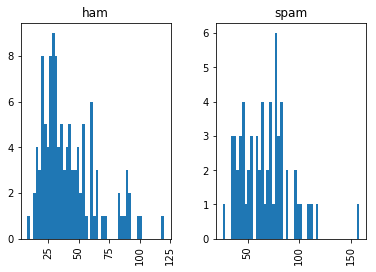

In [12]:
df.hist(column='length', by='label', bins=50)

# Data pre-processing
here we can use alot of NLP related task. however for this task, we are just preparing the data for train and test sets.

In [13]:
X_train=df["message"][:100]
Y_train=df["label"][:100]
X_test=df["message"][100:178]
Y_test=df["label"][100:178]

In [14]:
vectorizer=TfidfVectorizer(tokenizer= lambda x: x.split(" "),
                                  sublinear_tf=True, encoding='utf-8',
                                  decode_error='ignore',
                                  max_df=0.5,
                                  min_df=10)

In [15]:
train_data_features=vectorizer.fit_transform(X_train)
train_data_features=train_data_features.toarray()
test_data_features=vectorizer.transform(X_test)
test_data_features=test_data_features.toarray()

# define a machine learning model- Naive Bayes-Multinomial

In [16]:
NBclassifier=MultinomialNB()
NBclassifier.fit(train_data_features, Y_train)
predicted=NBclassifier.predict(test_data_features)

# Evaluate the matrices- Confusion Matrix

In [17]:
print(metrics.classification_report(Y_test,predicted))

             precision    recall  f1-score   support

        ham       0.82      0.92      0.87        53
       spam       0.76      0.54      0.63        24

avg / total       0.80      0.81      0.79        77



In [18]:
#define the model for Decsion Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
#your code goes here

In [19]:
#evaluate the model

In [ ]:
#define the model for Support Vector Machine
from sklearn import svm
clf = svm.SVC(kernel='linear') # this is a linear kernel
#your code goes here

In [20]:
#evaluate the model

In [ ]:
#NOw you can see the performance of each model on this dataset.